In [66]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [67]:
audio_file = 'C:/Users/Upris/Desktop/extreme api/Doggy-and-Cat-adventure/doom.wav'
y, sr = librosa.load(audio_file)

print(f"lenght signal {len(y)}")

lenght signal 9117443


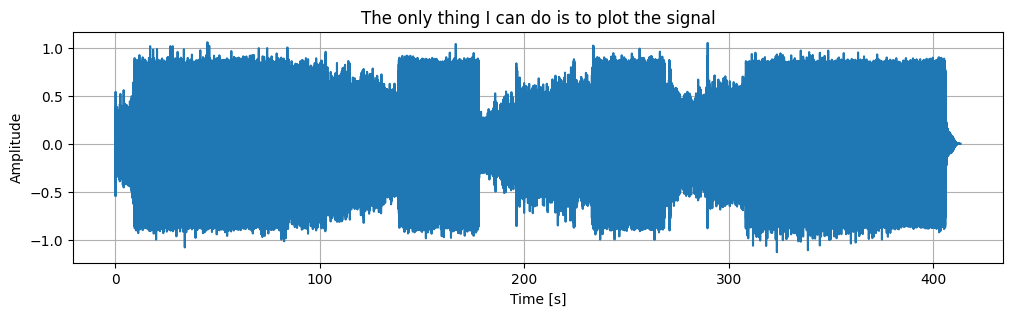

In [68]:
plt.figure(figsize=(12, 3))
plt.plot(np.arange(len(y)) / sr, y)
plt.title('The only thing I can do is to plot the signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [69]:
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {zcr.shape}")

Zero crossing rate: (1, 17808)


In [70]:
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    features = []

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.extend(np.mean(mfccs, axis=1))  # 13 valori

    features.append(float(np.mean(librosa.feature.rms(y=y))))
    features.append(float(np.mean(librosa.feature.zero_crossing_rate(y))))
    features.append(float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_flatness(y=y))))

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features.extend(np.mean(chroma, axis=1))

    harmonic = librosa.effects.harmonic(y)
    tonnetz = librosa.feature.tonnetz(y=harmonic, sr=sr)
    features.extend(np.mean(tonnetz, axis=1))

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features.append(float(tempo))

    return np.array(features)


In [71]:
f = extract_features(audio_file)
    
print(f"RMS shape: {f.shape}")

print(f)

RMS shape: (38,)
[-3.97601843e+00  7.98065338e+01 -9.84311676e+00  2.66214447e+01
  8.46763551e-02  1.39722195e+01  2.58312798e+00  8.23494053e+00
  2.84587312e+00  5.71469831e+00 -1.89055526e+00  6.85198450e+00
  1.29371154e+00  2.59298354e-01  1.14791308e-01  2.60048342e+03
  2.53477465e+03  5.46104486e+03  3.72889377e-02  4.67771947e-01
  4.92416292e-01  5.84736764e-01  6.79817080e-01  6.47498012e-01
  5.74099064e-01  4.96856928e-01  4.84250784e-01  4.54244554e-01
  4.58650917e-01  5.42614818e-01  5.30746281e-01 -1.34256168e-02
 -1.12143210e-02  6.80374393e-02  6.56249627e-03  1.71658798e-02
  1.49440380e-04  1.03359375e+02]


C:\Users\Upris\AppData\Local\Temp\ipykernel_7784\1114167458.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))
